# Loading Libraries


In [1]:
# To ignore the imports warning
import warnings
warnings.filterwarnings("ignore")
# For the dataset loading 
import pandas as pd
# for arrays manupulation
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For making train and test data 
from sklearn.model_selection import train_test_split
# For scaling the dataset 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Importing the machine learning models
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
# Functions to import the model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
from sklearn.neural_network import MLPRegressor

Loading Datasets


In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\efcos\Nangka\Nangka_ScienceGarden_Consolidated.csv')
df.dropna(inplace=True)
df.head()

,RAINFALL,TMAX,TMIN,TMEAN,WIND_SPEED,WIND_DIRECTION,FLOOD_HEIGHT_HIGHEST,FLOOD_HEIGHT_LOWEST,FLOOD__HEIGHT_AVE
0,0.2,31.8,22.7,27.3,1,70,-1.0,-1.0,-1.0
1,0.0,31.5,22.0,26.8,1,50,-1.0,-1.0,-1.0
2,0.0,31.0,20.6,25.8,1,270,-1.0,-1.0,-1.0
3,0.0,31.8,20.9,26.4,1,50,-1.0,-1.0,-1.0
4,0.0,31.0,22.4,26.7,1,360,-1.0,-1.0,-1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RAINFALL              8036 non-null   float64
 1   TMAX                  8036 non-null   float64
 2   TMIN                  8036 non-null   float64
 3   TMEAN                 8036 non-null   float64
 4   WIND_SPEED            8036 non-null   int64  
 5   WIND_DIRECTION        8036 non-null   int64  
 6   FLOOD_HEIGHT_HIGHEST  8036 non-null   float64
 7   FLOOD_HEIGHT_LOWEST   8036 non-null   float64
 8   FLOOD__HEIGHT_AVE     8036 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 565.2 KB


Visualizing data using Matplotlib and Seaborn



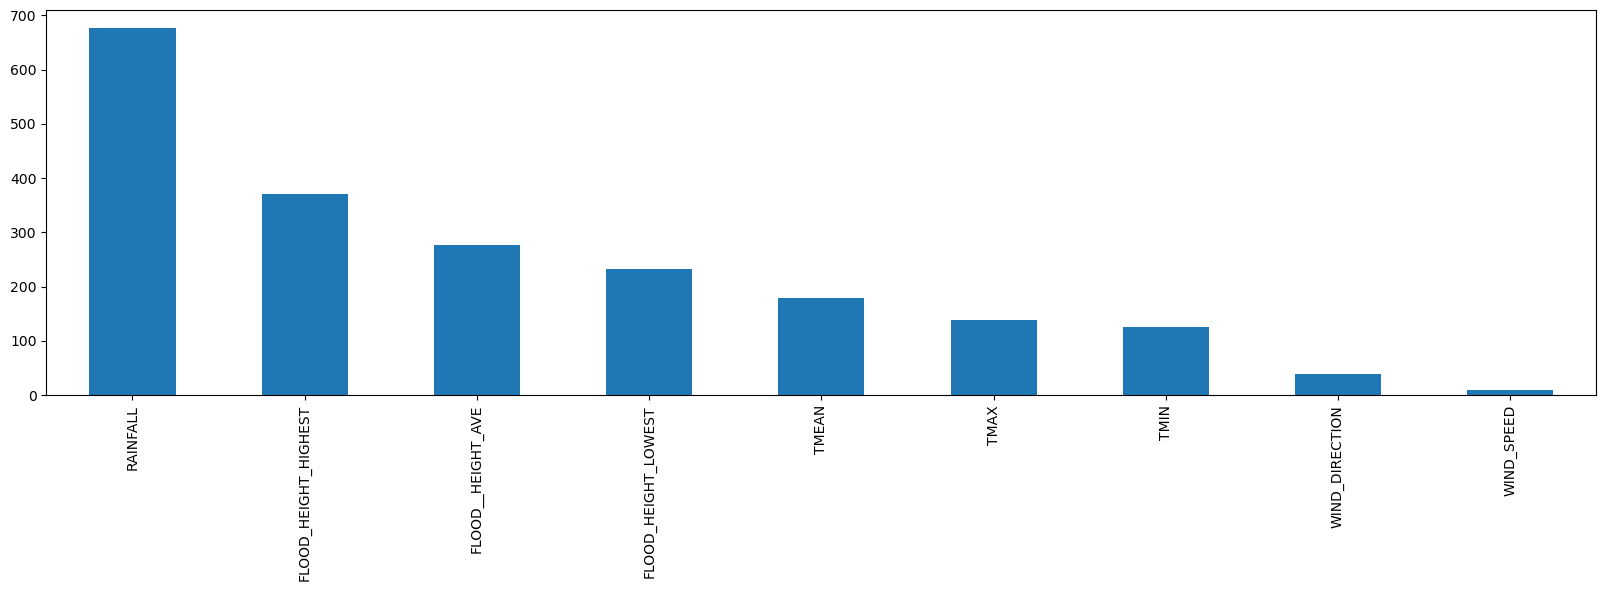

In [4]:
plt.figure(figsize=(20,5))
df.nunique().sort_values(ascending=False).plot(kind='bar');

In [5]:
df.columns

Index(['RAINFALL', 'TMAX', 'TMIN', 'TMEAN', 'WIND_SPEED', 'WIND_DIRECTION',
       'FLOOD_HEIGHT_HIGHEST', 'FLOOD_HEIGHT_LOWEST', 'FLOOD__HEIGHT_AVE'],
      dtype='object')

Countplot of duration

Relation Between Various Factors

In [6]:
# get the unique values of each column
df.nunique()


RAINFALL                676
TMAX                    138
TMIN                    125
TMEAN                   179
WIND_SPEED               10
WIND_DIRECTION           38
FLOOD_HEIGHT_HIGHEST    370
FLOOD_HEIGHT_LOWEST     233
FLOOD__HEIGHT_AVE       277
dtype: int64

The data types associated with the columns are:

Correlation Of All Atributes in DataFrame


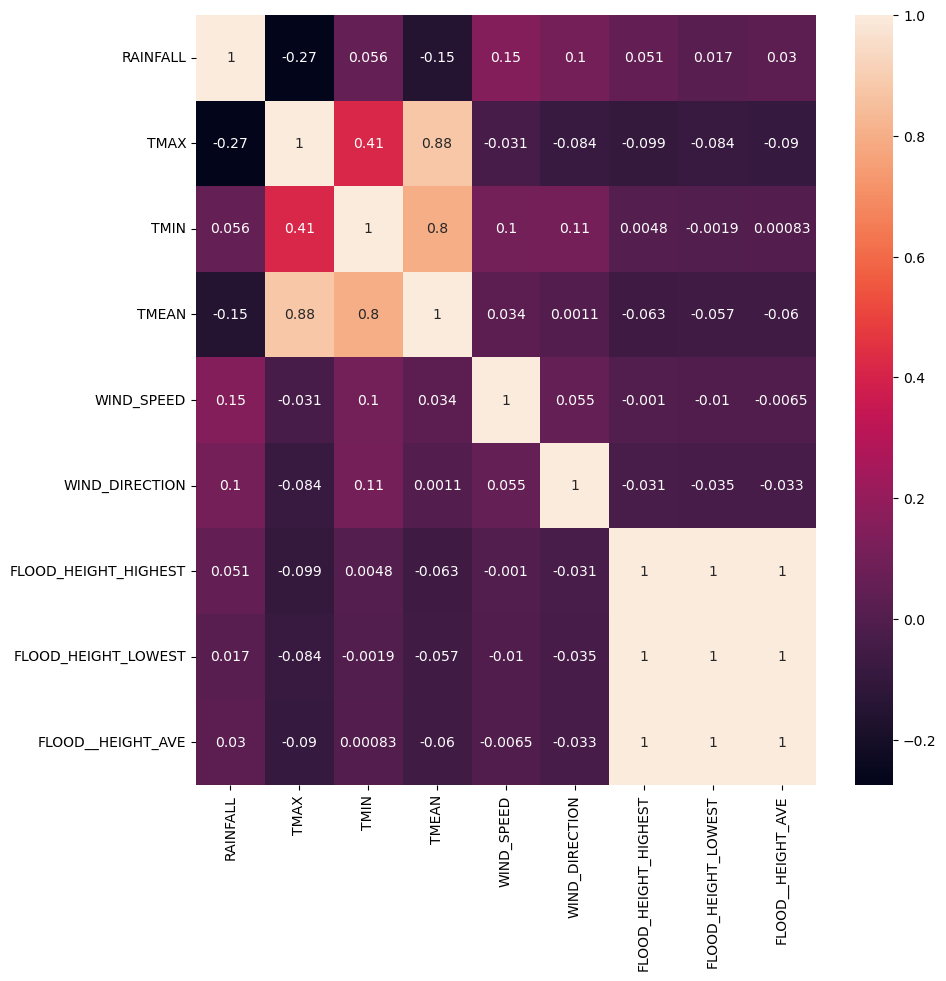

In [7]:

plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot= True);


# Data Preprocessing
Drop Useless Column In Dataframe


In [8]:
df.columns

Index(['RAINFALL', 'TMAX', 'TMIN', 'TMEAN', 'WIND_SPEED', 'WIND_DIRECTION',
       'FLOOD_HEIGHT_HIGHEST', 'FLOOD_HEIGHT_LOWEST', 'FLOOD__HEIGHT_AVE'],
      dtype='object')

In [9]:
df.shape

(8036, 9)

In [10]:
df.dtypes

RAINFALL                float64
TMAX                    float64
TMIN                    float64
TMEAN                   float64
WIND_SPEED                int64
WIND_DIRECTION            int64
FLOOD_HEIGHT_HIGHEST    float64
FLOOD_HEIGHT_LOWEST     float64
FLOOD__HEIGHT_AVE       float64
dtype: object

Text(0.5, 1.0, 'Relation Between flood height and precipitation')

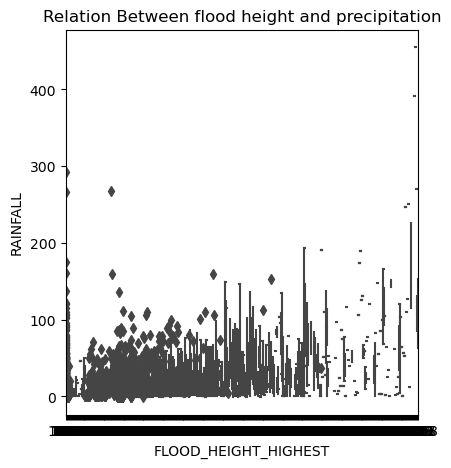

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['FLOOD_HEIGHT_HIGHEST'],y=df['RAINFALL'],data=df)
plt.title('Relation Between flood height and precipitation')

Seprate Data Into Feature(x) and Labels(y)

In [12]:
X = df.drop(['FLOOD_HEIGHT_HIGHEST'], axis=1)
y= df['FLOOD_HEIGHT_HIGHEST']

In [13]:
X

,RAINFALL,TMAX,TMIN,TMEAN,WIND_SPEED,WIND_DIRECTION,FLOOD_HEIGHT_LOWEST,FLOOD__HEIGHT_AVE
0,0.2,31.8,22.7,27.3,1,70,-1.00,-1.00
1,0.0,31.5,22.0,26.8,1,50,-1.00,-1.00
2,0.0,31.0,20.6,25.8,1,270,-1.00,-1.00
3,0.0,31.8,20.9,26.4,1,50,-1.00,-1.00
4,0.0,31.0,22.4,26.7,1,360,-1.00,-1.00
...,...,...,...,...,...,...,...,...
8031,-1.0,28.1,23.1,25.6,2,20,15.87,15.87
8032,-1.0,29.2,23.2,26.2,1,360,15.87,15.87
8033,0.0,30.6,22.4,26.5,1,20,15.87,15.88
8034,0.0,29.9,20.1,25.0,1,10,15.87,15.87


In [14]:
# train test split 
x_train,x_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2,random_state=0)


Apply Standard Scaler On Traning Part Of Data Set


In [15]:
# scaling
std = StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)


# Applying Regression Models


In [16]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

# Applying Naive Bayes, Random Forest and Support Vector Machines


In [17]:
# For Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=1400, min_samples_split= 5, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 80, bootstrap = True)
rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)

# For ANN Regressor
ANN_model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='relu', solver='adam', random_state=50)
ANN_model.fit(x_train, y_train)
pred_ANN = ANN_model.predict(x_test)

# For SVM Regression
SVR_model = SVR(kernel='rbf', C=1000) 
SVR_model.fit(x_train, y_train)
pred_SVR = SVR_model.predict(x_test)



In [18]:
# function for evaluation metrics 
def modelcrossvalidation(scores):
    results = [plt.plot(range(1, 11), scores, 'o-'), plt.xlabel('Fold'), plt.ylabel('Score'), plt.title('Cross-validation results'), plt.show()]
    return results

Mean Squared Error: 0.05222045062147276


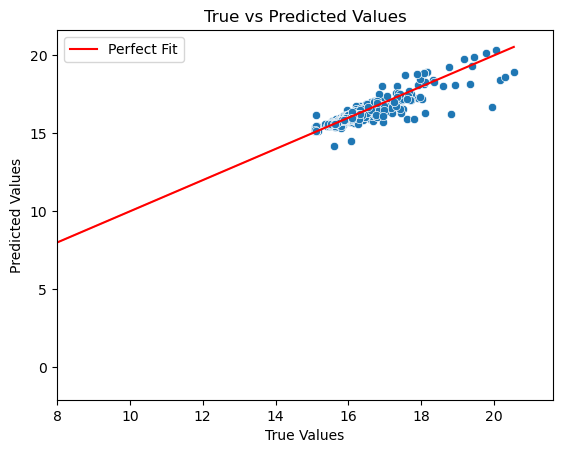

Mean Squared Error: 0.09692729355211578


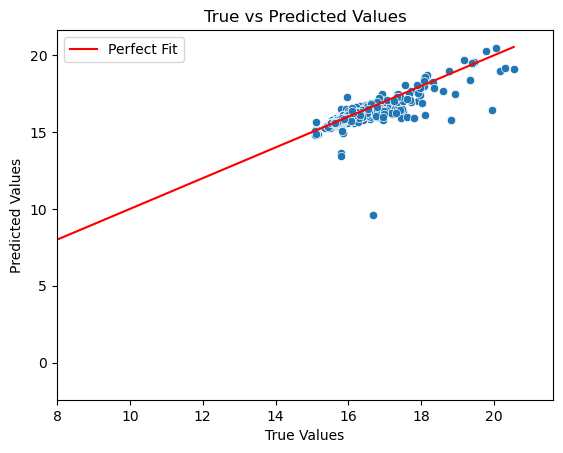

Mean Squared Error: 0.1351315063667311


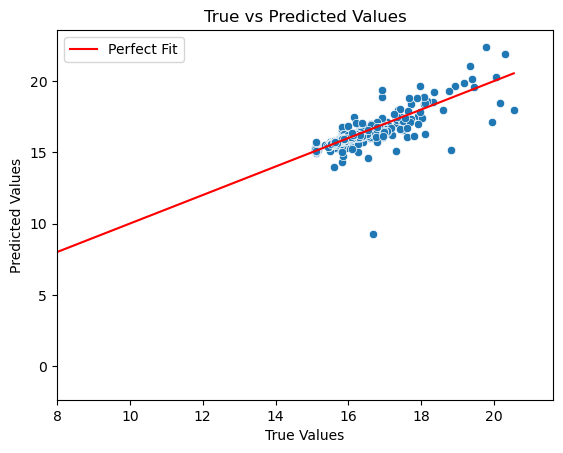

In [19]:
# For Random Forest Regression
rf_mse = mean_squared_error(y_test, pred_rf)
print("Mean Squared Error:", rf_mse)
sns.scatterplot(x=y_test, y=pred_rf)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')
plt.xlim(left=8) 
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

# For Artificial Neural Network Regression
ANN_mse = mean_squared_error(y_test, pred_ANN)
print("Mean Squared Error:", ANN_mse)
sns.scatterplot(x=y_test, y=pred_ANN)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')
plt.xlim(left=8) 
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()
# For Support Vector Machines Regression
SVR_mse = mean_squared_error(y_test, pred_SVR)
print("Mean Squared Error:", SVR_mse)
sns.scatterplot(x=y_test, y=pred_SVR)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')
plt.xlim(left=8) 
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

==========Random Forest==========
Score: [0.99907469 0.99768694 0.99920851 0.99710555 0.99818395 0.99894949
 0.99860103 0.99916289 0.98951081 0.99755728]
Average accuracy: 0.9975041153678486
Standard deviation: 0.0027561883553998577


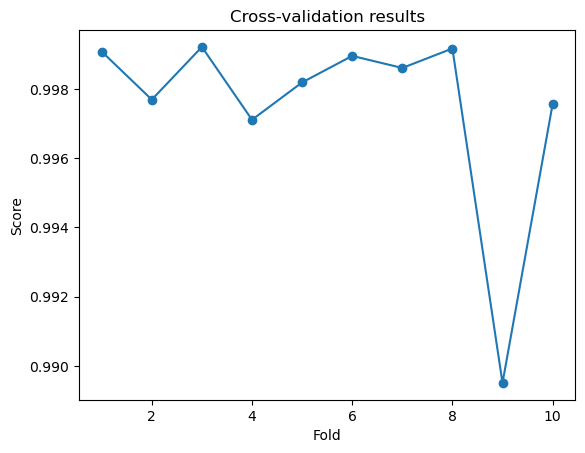

==========Artificial Neural Network==========
Score: [0.9986242  0.99813756 0.99896627 0.99235278 0.99816279 0.99810532
 0.99792141 0.99888092 0.98668364 0.99793927]
Average accuracy: 0.9965774176036666
Standard deviation: 0.0037666882470341156


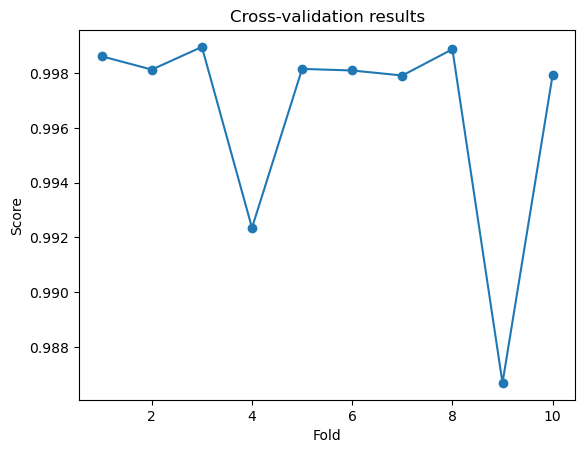

==========Support Vector Machines==========
Score: [0.9970812  0.99795832 0.9954679  0.99247435 0.99560206 0.99245798
 0.98916108 0.9970057  0.98317965 0.9966855 ]
Average accuracy: 0.9937073742260033
Standard deviation: 0.004364331592285328


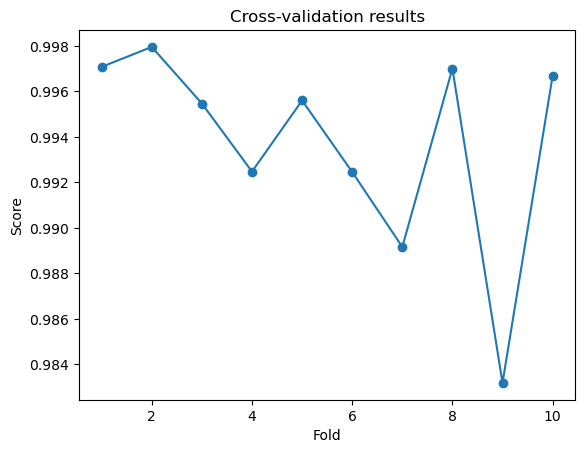

[[<matplotlib.lines.Line2D at 0x21ab02c34f0>],
 Text(0.5, 24.0, 'Fold'),
 Text(24.0, 0.5, 'Score'),
 Text(0.5, 1.0, 'Cross-validation results'),
 None]

In [20]:
# For Random Forest Regression
print("==========Random Forest==========")
rfscores = cross_val_score(rf_model, x_train, y_train, cv=10)
print("Score:", rfscores)
print("Average accuracy:", rfscores.mean())
print("Standard deviation:", rfscores.std())
modelcrossvalidation(rfscores)
# For Artificial Neural Network Regression
print("==========Artificial Neural Network==========")
ANNscores = cross_val_score(ANN_model, x_train, y_train, cv=10)
print("Score:", ANNscores)
print("Average accuracy:", ANNscores.mean())
print("Standard deviation:", ANNscores.std())
modelcrossvalidation(ANNscores)
# For Support Vector Machines Regression
print("==========Support Vector Machines==========")
SVRscores = cross_val_score(SVR_model, x_train, y_train, cv=10)
print("Score:", SVRscores)
print("Average accuracy:", SVRscores.mean())
print("Standard deviation:", SVRscores.std())
modelcrossvalidation(SVRscores)

# Comparsion Between Artificial Neural Network, Random Forest and Support Vector Machines

In [21]:

# showing cross-validation
dic2 = {
 'Metrics':['mean', 'standard deviation'],
 'Random Forest' : (rfscores.mean(), rfscores.std()),
 'Artificial Neural Network': (ANNscores.mean(), ANNscores.std()),
 'Support Vector Machines': (SVRscores.mean(), SVRscores.std()),
}
metrics_df2 = pd.DataFrame(dic2)
metrics_df2 = metrics_df2.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df2, headers = 'keys', tablefmt = 'psql'))

+--------------------+-----------------+-----------------------------+---------------------------+
| Metrics            |   Random Forest |   Artificial Neural Network |   Support Vector Machines |
|--------------------+-----------------+-----------------------------+---------------------------|
| mean               |      0.997504   |                  0.996577   |                0.993707   |
| standard deviation |      0.00275619 |                  0.00376669 |                0.00436433 |
+--------------------+-----------------+-----------------------------+---------------------------+


In [22]:
# showing Mean Squared Error
dic1 = {
 'Metrics':['Mean Squared Error'],
 'Random Forest' : (rf_mse),
 'Artificial Neural Network': (ANN_mse),
 'Support Vector Machines': (SVR_mse),
}
metrics_df1 = pd.DataFrame(dic1)
metrics_df1 = metrics_df1.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df1, headers = 'keys', tablefmt = 'psql'))

+--------------------+-----------------+-----------------------------+---------------------------+
| Metrics            |   Random Forest |   Artificial Neural Network |   Support Vector Machines |
|--------------------+-----------------+-----------------------------+---------------------------|
| Mean Squared Error |       0.0522205 |                   0.0969273 |                  0.135132 |
+--------------------+-----------------+-----------------------------+---------------------------+


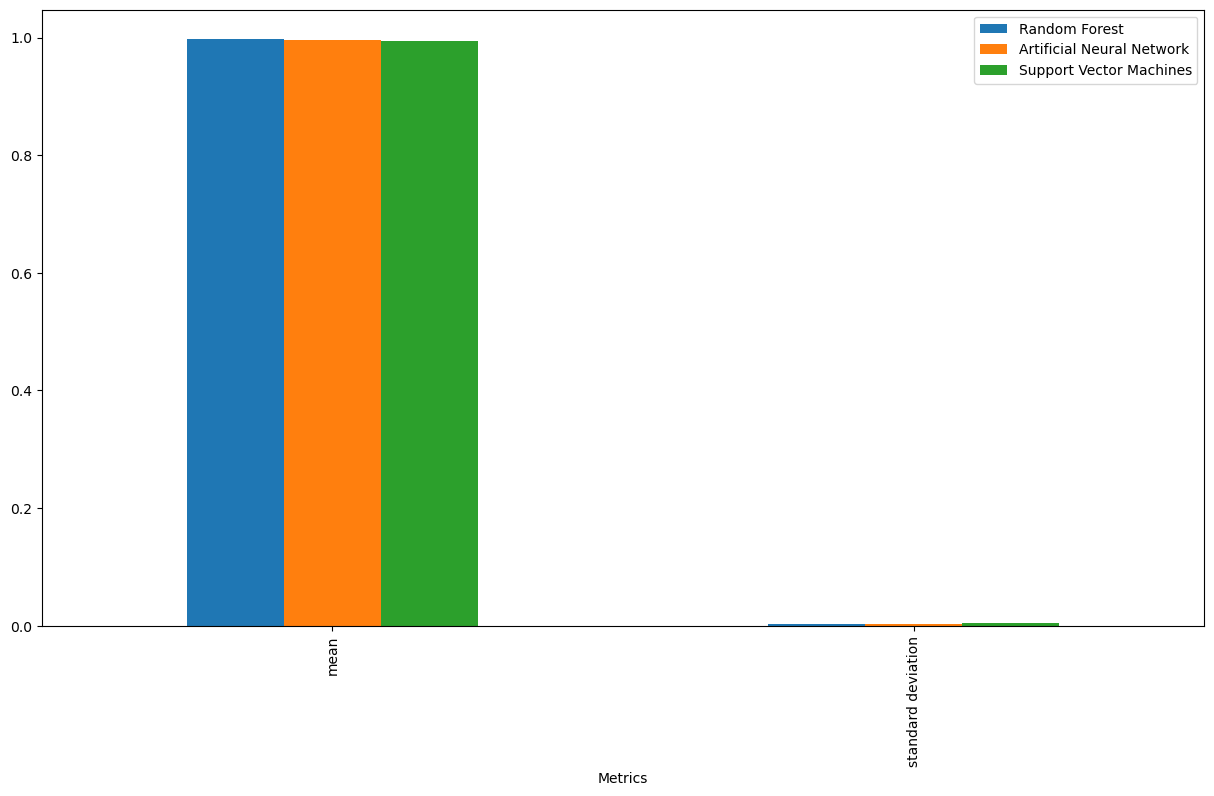

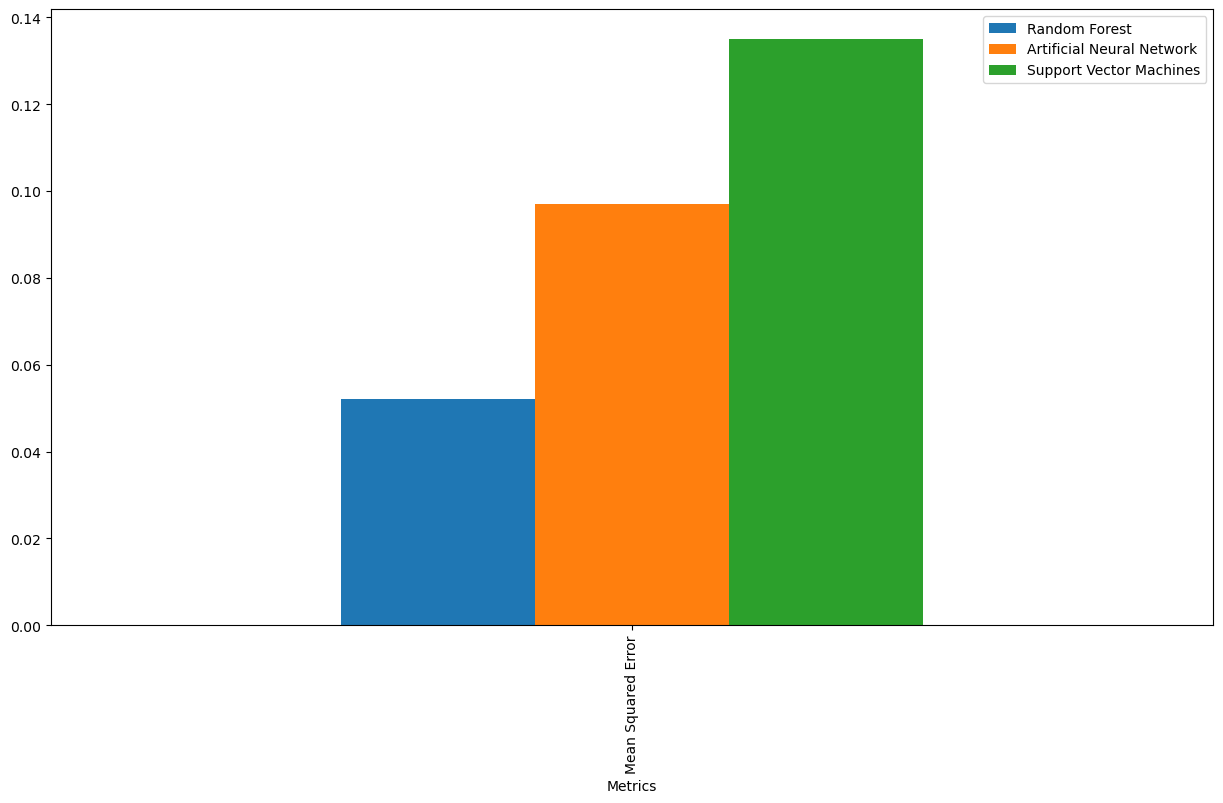

In [23]:
# Evluations comparisons graph
metrics_df2.plot(kind='bar', figsize=(15,8))
plt.show()
metrics_df1.plot(kind='bar', figsize=(15,8))
plt.show()